In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'monospace'
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [44]:
df1 = pd.read_csv('ML.csv')
df2 = pd.read_csv('MLtag.csv')
df1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [45]:
df2.head()

,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1
2,92735,head,type1
3,1615,head,type1
4,4161,head,type1


# Data Cleaning

#### Checking the shape of the dataframes

In [46]:
df1.shape

(2340, 7)

In [47]:
df2.shape

(1484, 3)

#### Checking for Null values

In [48]:
# DF1 null values
df1.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [49]:
# DF2 null values
df2.isnull().sum()

guiltyid        0
levelofcrime    0
typeofcrime     0
dtype: int64

#### Checking for duplicates

In [50]:
# DF1 
df1.duplicated().sum()

0

In [51]:
# DF2
df2.duplicated().sum()

3

In [52]:
# Removing duplicates
df2.drop_duplicates(inplace=True)

#### Checking the data types of the columns

In [53]:
df1.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

In [54]:
df1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [55]:
df1['date'] = pd.to_datetime(df1['date'])

In [56]:
df1['date'] = pd.to_datetime(df1['date']).dt.date

In [57]:
df1.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

In [58]:
df1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19,1,type1
1,cash-in,30105,8692,494528,2019-05-17,1,type1
2,cash-in,30105,60094,494528,2019-07-20,1,type1
3,cash-in,30105,20575,494528,2019-07-03,1,type1
4,cash-in,30105,45938,494528,2019-05-26,1,type1


In [59]:
df2.head()

,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1
2,92735,head,type1
3,1615,head,type1
4,4161,head,type1


In [60]:
df2.dtypes

guiltyid         int64
levelofcrime    object
typeofcrime     object
dtype: object

#### Checking the unique values

In [61]:
# DF1 unique values
df1['sourceid'].nunique()

1749

In [62]:
df2['guiltyid'].nunique()

1442

<Axes: >

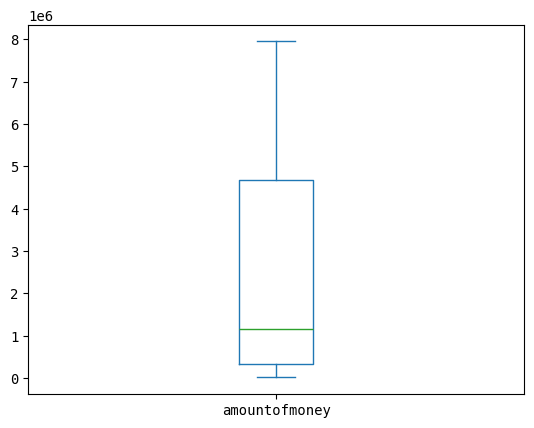

In [63]:
# Checking for outliers

df1['amountofmoney'].plot(kind='box')

In [64]:
df2['typeofcrime'].unique()

array(['type1', 'type2-1', 'type2-2', 'type3', 'type2'], dtype=object)

In [65]:
'''
Since type 2 has two sub-categories we are going to replace the type2-1 and type2-2 to type2
'''
df2['typeofcrime'] = df2['typeofcrime'].replace({'type2-1': 'type2', 'type2-2': 'type2'})

In [66]:
df2['typeofcrime'].unique()


array(['type1', 'type2', 'type3'], dtype=object)

In [67]:
df1['typeoffraud'].unique()

array(['type1', 'type2', 'type3', 'none'], dtype=object)

In [68]:
'''
None type means it is not considered as fraud. So we are going to consider it for the counting.
'''
none_count = df1[df1['typeoffraud'] == 'none'].shape[0]
none_count

941

In [69]:
# Checking how many common ids are there from df1 and df2
# Find common IDs
common_ids = df1['sourceid'][df1['sourceid'].isin(df2['guiltyid'])]

# Count the number of common IDs
common_count = common_ids.count()
print(f"No. of rows in df1: {len(df1)}\nNo. of rows in df2: {len(df2)} \nNo. of common id: {common_count}")

No. of rows in df1: 2340
No. of rows in df2: 1481 
No. of common id: 1449


In [70]:
# Checking how many common types are there from df1['typeoffraud'] and df2['typeofcrime']
# Find common types
common_types = df1['typeoffraud'][df1['typeoffraud'].isin(df2['typeofcrime'])]

# Count the number of common IDs
common_count = common_types.count()
print(f"No. of rows in df1: {len(df1)}\nNo. of rows in df2: {len(df2)} \nNo. of common id: {common_count}")

No. of rows in df1: 2340
No. of rows in df2: 1481 
No. of common id: 1399


<Axes: >

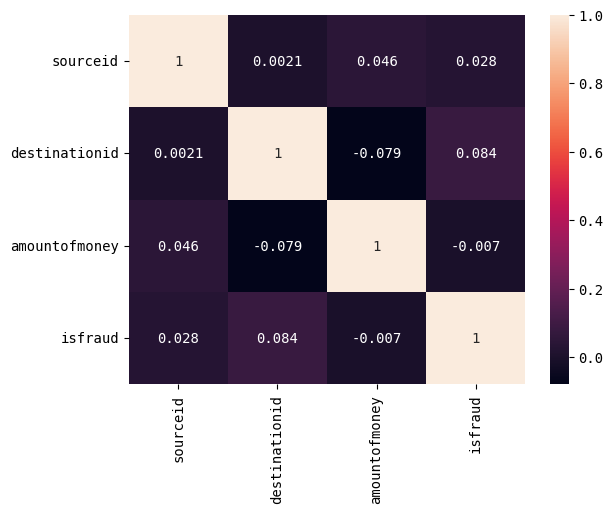

In [71]:
cor = df1.corr(numeric_only=True)
sns.heatmap(cor, annot=True)

In [72]:
merged_df = pd.merge(df1, df2, left_on=['sourceid'], right_on=['guiltyid'], how='inner')
merged_df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,guiltyid,levelofcrime,typeofcrime
0,cash-in,30105,28942,494528,2019-07-19,1,type1,30105,head,type1
1,cash-in,30105,8692,494528,2019-05-17,1,type1,30105,head,type1
2,cash-in,30105,60094,494528,2019-07-20,1,type1,30105,head,type1
3,cash-in,30105,20575,494528,2019-07-03,1,type1,30105,head,type1
4,cash-in,30105,45938,494528,2019-05-26,1,type1,30105,head,type1


In [73]:
print(((merged_df.isnull().sum())/len(merged_df))*100)

typeofaction     0.0
sourceid         0.0
destinationid    0.0
amountofmoney    0.0
date             0.0
isfraud          0.0
typeoffraud      0.0
guiltyid         0.0
levelofcrime     0.0
typeofcrime      0.0
dtype: float64


<Axes: >

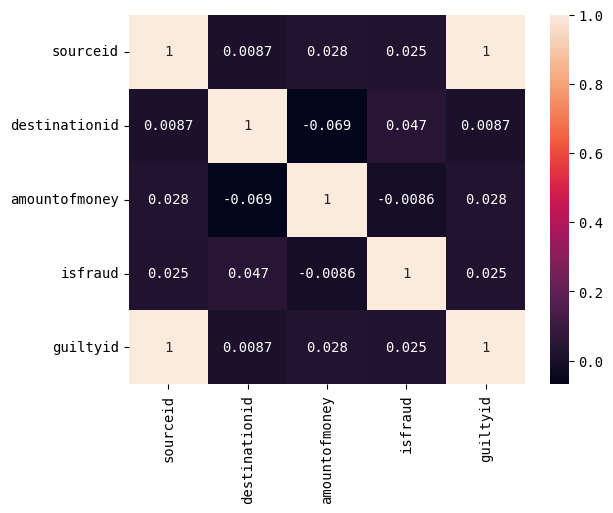

In [74]:
cor = merged_df.corr(numeric_only=True)
sns.heatmap(cor, annot=True)

In [75]:
merged_df.isnull().sum()


typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
guiltyid         0
levelofcrime     0
typeofcrime      0
dtype: int64

In [76]:
len(merged_df)

1503

In [77]:
# Dropping the guiltyid because 'guiltyid' and 'sourceid' are same
merged_df.drop(columns=['guiltyid'], inplace=True)

### Final merged file

In [78]:
merged_df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime
0,cash-in,30105,28942,494528,2019-07-19,1,type1,head,type1
1,cash-in,30105,8692,494528,2019-05-17,1,type1,head,type1
2,cash-in,30105,60094,494528,2019-07-20,1,type1,head,type1
3,cash-in,30105,20575,494528,2019-07-03,1,type1,head,type1
4,cash-in,30105,45938,494528,2019-05-26,1,type1,head,type1
...,...,...,...,...,...,...,...,...,...
1498,transfer,33174,26740,3802359,2019-03-06,0,none,colleague,type2
1499,transfer,41032,44509,4634190,2019-06-23,0,none,colleague,type2
1500,transfer,97966,95152,1162767,2019-07-19,0,none,colleague,type2
1501,transfer,70242,418,2501184,2019-03-21,0,none,colleague,type2


In [79]:
merged_df.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
levelofcrime     object
typeofcrime      object
dtype: object

In [80]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [81]:
merged_df['month'] = merged_df['date'].dt.month

In [82]:
merged_df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,month
0,cash-in,30105,28942,494528,2019-07-19,1,type1,head,type1,7
1,cash-in,30105,8692,494528,2019-05-17,1,type1,head,type1,5
2,cash-in,30105,60094,494528,2019-07-20,1,type1,head,type1,7
3,cash-in,30105,20575,494528,2019-07-03,1,type1,head,type1,7
4,cash-in,30105,45938,494528,2019-05-26,1,type1,head,type1,5


In [83]:
merged_df.dtypes


typeofaction             object
sourceid                  int64
destinationid             int64
amountofmoney             int64
date             datetime64[ns]
isfraud                   int64
typeoffraud              object
levelofcrime             object
typeofcrime              object
month                     int32
dtype: object

In [84]:
merged_df.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
levelofcrime     0
typeofcrime      0
month            0
dtype: int64

In [85]:
'''
This will convert the merged_df to a csv file. You will get it in the folder you are running this .ipynb file
'''
merged_df.to_csv('merged_data.csv', index=False)

# Data Visualization

### Correlation matrix

In [86]:
df = pd.read_csv('merged_data.csv')

In [87]:
df.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
levelofcrime     0
typeofcrime      0
month            0
dtype: int64

In [88]:
df.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
levelofcrime     object
typeofcrime      object
month             int64
dtype: object

In [89]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,month
0,cash-in,30105,28942,494528,2019-07-19,1,type1,head,type1,7
1,cash-in,30105,8692,494528,2019-05-17,1,type1,head,type1,5
2,cash-in,30105,60094,494528,2019-07-20,1,type1,head,type1,7
3,cash-in,30105,20575,494528,2019-07-03,1,type1,head,type1,7
4,cash-in,30105,45938,494528,2019-05-26,1,type1,head,type1,5


In [91]:
print(df['isfraud'].unique())


[1 0]


In [92]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,sourceid,destinationid,amountofmoney,isfraud,month
sourceid,1.000000,0.008650,0.028159,0.025199,0.005536
destinationid,0.008650,1.000000,-0.068900,0.047496,-0.054273
amountofmoney,0.028159,-0.068900,1.000000,-0.008644,0.050437
isfraud,0.025199,0.047496,-0.008644,1.000000,-0.036266
month,0.005536,-0.054273,0.050437,-0.036266,1.000000


<Axes: >

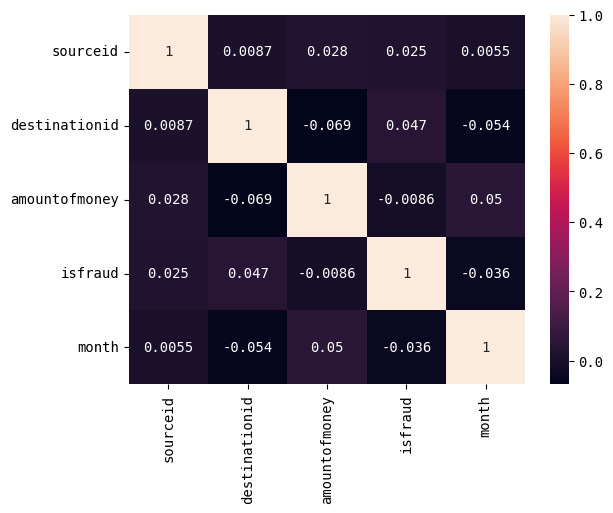

In [93]:
sns.heatmap(correlation_matrix, annot=True)

#### 1. The total amount of money transacted over time.

In [94]:
daily_transactions = df.groupby('date')['amountofmoney'].sum().reset_index()
daily_transactions

,date,amountofmoney
0,2019-02-20,3371813
1,2019-02-21,27887725
2,2019-02-22,16468190
3,2019-02-23,23259063
4,2019-02-24,9658562
...,...,...
146,2019-07-16,46105037
147,2019-07-17,23443442
148,2019-07-18,33373806
149,2019-07-19,29635743


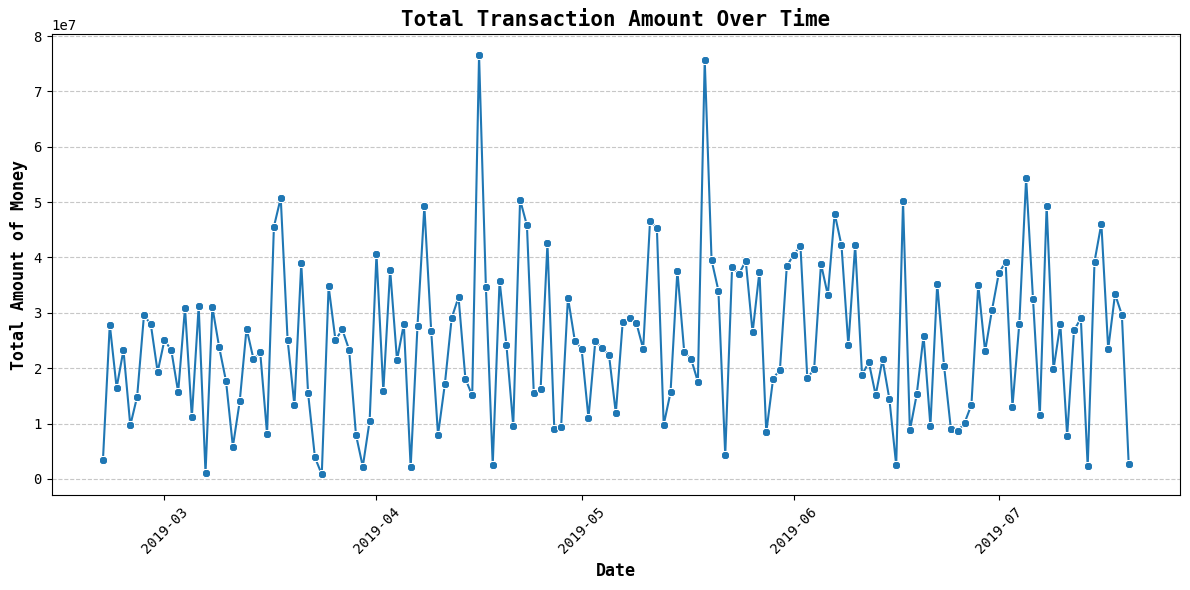

In [95]:
# Line chart to visulaize the total amount of money transacted over time.
plt.figure(figsize=(12, 6))
sns.lineplot(daily_transactions, x = 'date', y = 'amountofmoney', marker = '8', linewidth = 1.5)
plt.title('Total Transaction Amount Over Time', fontsize = 15, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Amount of Money', fontsize = 12, fontweight = 'bold')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

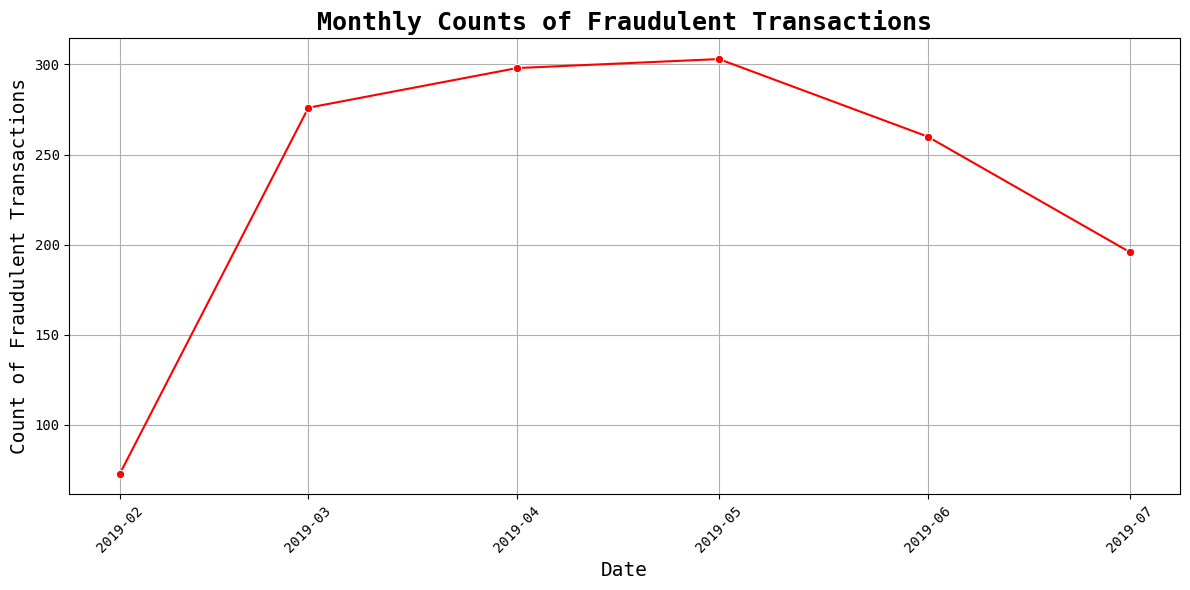

In [96]:
# Group by month, counting fraudulent transactions
monthly_fraud_counts = df[df['isfraud'] == 1].groupby(df['date'].dt.to_period('M')).size().reset_index(name='Count')
monthly_fraud_counts['date'] = monthly_fraud_counts['date'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting the line chart for monthly fraud trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_fraud_counts, x='date', y='Count', marker='o', color='red')
plt.title('Monthly Counts of Fraudulent Transactions', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


#### 2. Count of fraudulent vs non-fraudulent transactions

In [97]:
fraud_counts = df['isfraud'].value_counts().reset_index()
fraud_counts.columns = ['Fraud Status', 'Count']

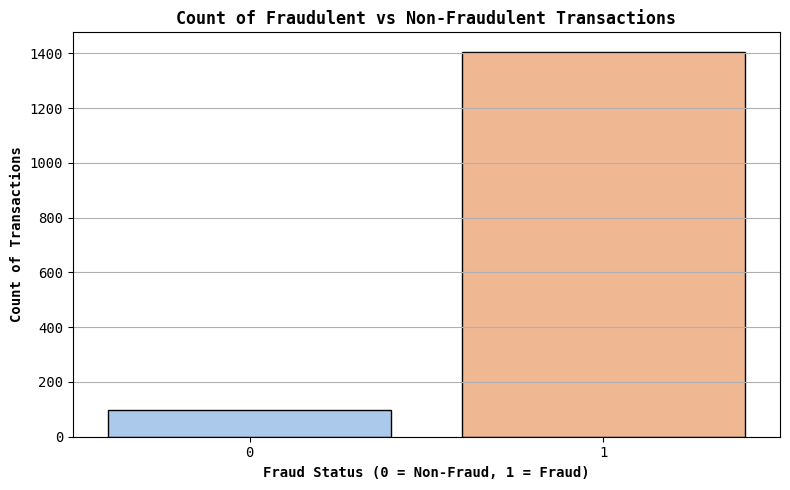

In [98]:
# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_counts, x='Fraud Status', y='Count', palette='pastel', edgecolor='black')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions', fontweight='bold')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)', fontweight='bold')
plt.ylabel('Count of Transactions', fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

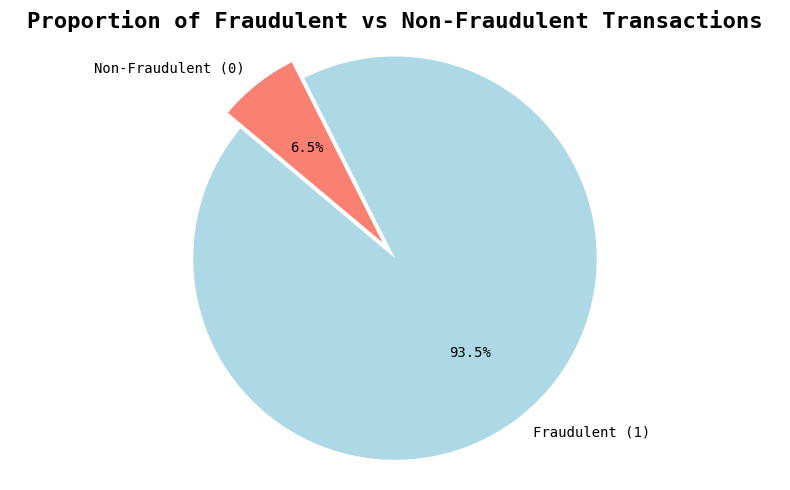

In [99]:
# Define labels and sizes for the pie chart
labels = ['Fraudulent (1)', 'Non-Fraudulent (0)']
sizes = fraud_counts['Count']
colors = ['lightblue', 'salmon']  # Colors for each section of the pie chart

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions', fontweight='bold', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

#### 3. Distribution of Transaction Amounts

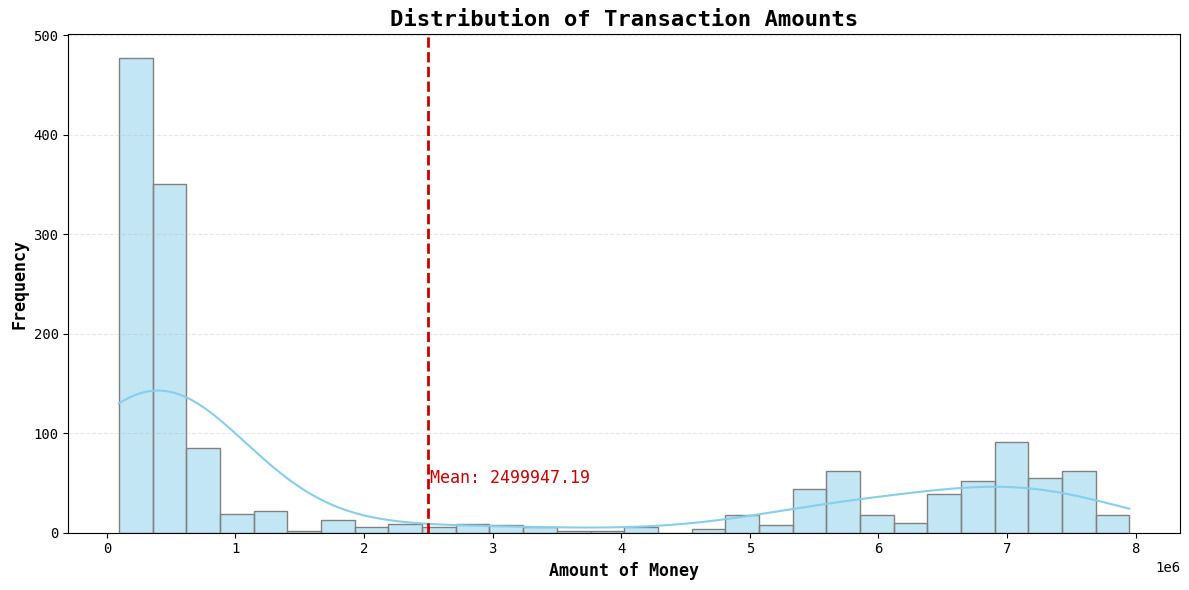

In [100]:
# Plotting a histogram of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['amountofmoney'], bins=30, kde=True, color='skyblue', edgecolor='gray')
plt.title('Distribution of Transaction Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Amount of Money', fontsize=12, fontweight='bold' )
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Adding a vertical line for the mean amount
mean_value = df['amountofmoney'].mean()
plt.axvline(mean_value, color='#cc0000', linestyle='dashed', linewidth=2)
plt.text(mean_value + 10000, 50, f'Mean: {mean_value:.2f}', color='#cc0000', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### 4. Fraud Type Analysis

In [101]:
# Count of each type of fraud
fraud_type_counts = df['typeoffraud'].value_counts().reset_index()
fraud_type_counts.columns = ['Type of Fraud', 'Count']
fraud_type_counts

,Type of Fraud,Count
0,type3,516
1,type2,467
2,type1,423
3,none,97


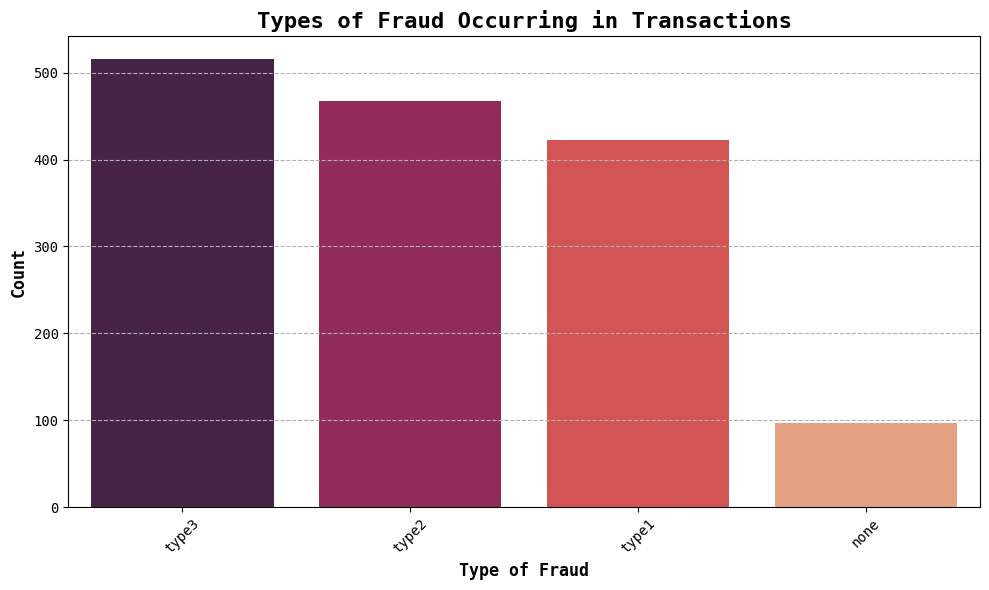

In [102]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_type_counts, x='Type of Fraud', y='Count', palette='rocket')
plt.title('Types of Fraud Occurring in Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Type of Fraud', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### 5. Heatmap of Crime Levels Over Time

In [103]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(values='amountofmoney', index='levelofcrime', columns=df['date'].dt.to_period("M"), aggfunc='sum')
heatmap_data

date,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
levelofcrime,,,,,,
colleague,33848312,401671785,651863870,756445533,668939849,505377877
head,138458185,233410681,147763134,103461956,68404316,47775135


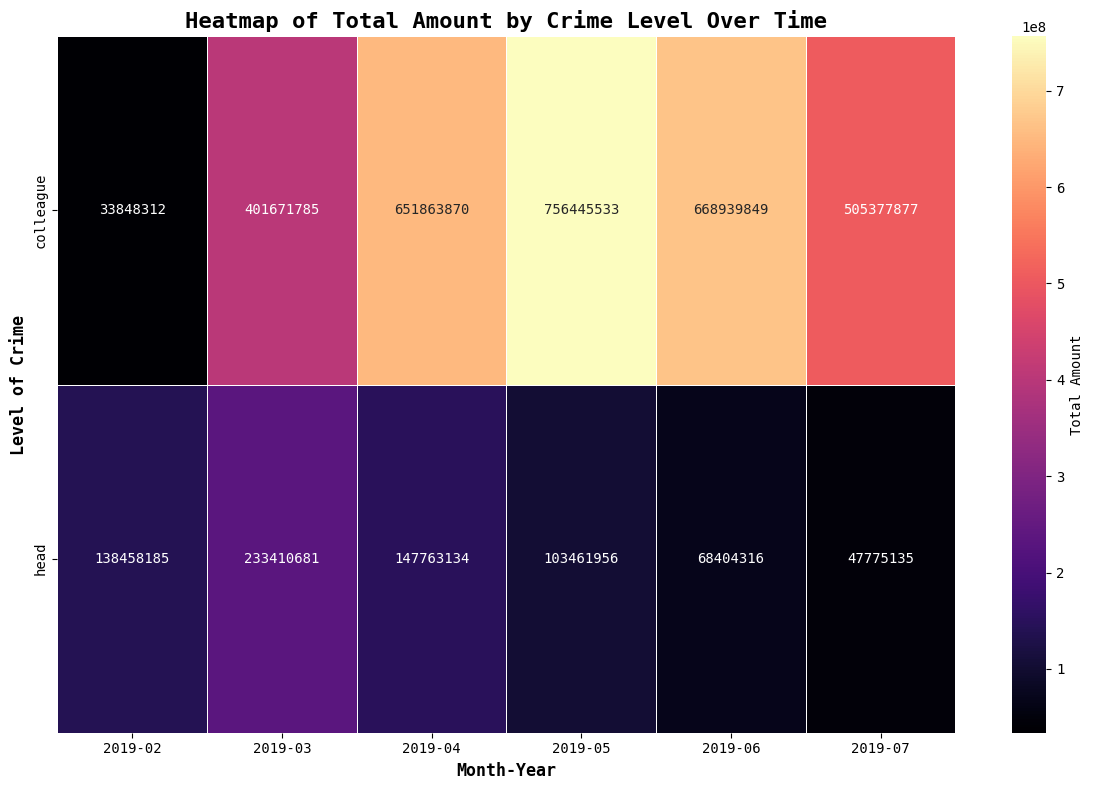

In [104]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Amount'})
plt.title('Heatmap of Total Amount by Crime Level Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Level of Crime', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

#### 6. Crime Level Trends

In [105]:
# Group by month and level of crime, calculating the average transaction amount
monthly_crime_trends = df.groupby([df['date'].dt.to_period('M'), 'levelofcrime'])['amountofmoney'].mean().reset_index()
monthly_crime_trends['date'] = monthly_crime_trends['date'].dt.to_timestamp()  # Convert back to timestamp for plotting
monthly_crime_trends

,date,levelofcrime,amountofmoney
0,2019-02-01,colleague,1.253641e+06
1,2019-02-01,head,2.884546e+06
2,2019-03-01,colleague,2.376756e+06
3,2019-03-01,head,1.897648e+06
4,2019-04-01,colleague,3.104114e+06
5,2019-04-01,head,1.368177e+06
6,2019-05-01,colleague,3.288894e+06
7,2019-05-01,head,1.077729e+06
8,2019-06-01,colleague,3.430461e+06
9,2019-06-01,head,7.862565e+05


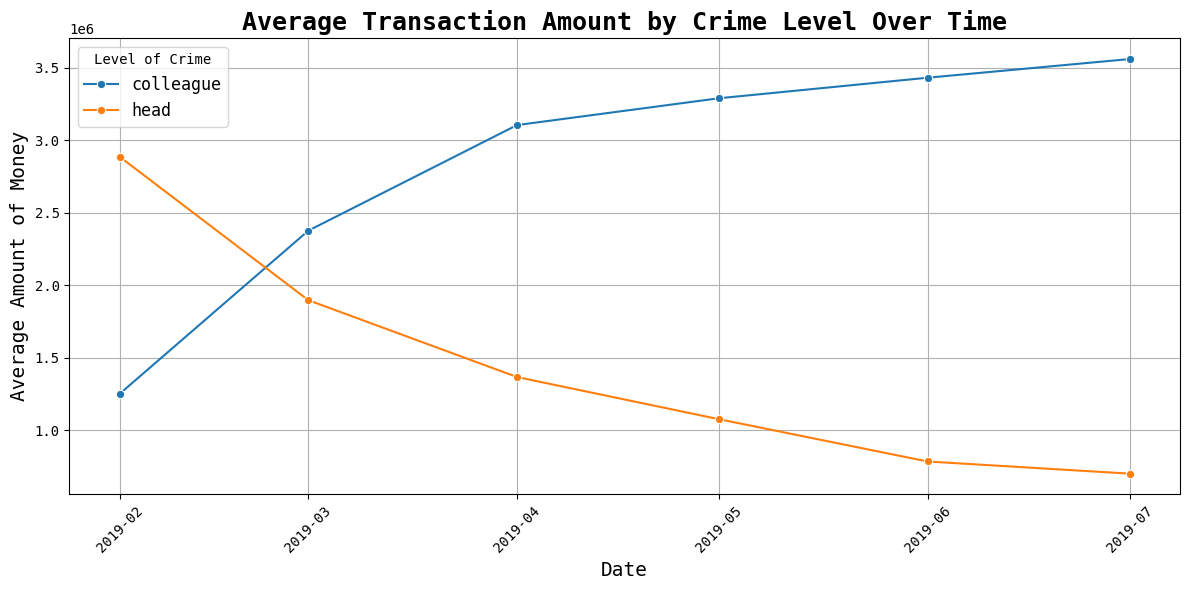

In [106]:
# Plotting the line chart for crime level trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_crime_trends, x='date', y='amountofmoney', hue='levelofcrime', marker='o')
plt.title('Average Transaction Amount by Crime Level Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Amount of Money', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Level of Crime', fontsize=12)
plt.tight_layout()
plt.show()

In [107]:
# 1. Find the highest cash transaction
cash_transactions = df[df['typeofaction'] == 'cash-in']  # Assuming 'cash-in' indicates cash transactions
highest_cash_transaction = cash_transactions.loc[cash_transactions['amountofmoney'].idxmax()]

# 2. Find the highest transaction done by transferring
transfer_transactions = df[df['typeofaction'] == 'transfer']  # Assuming 'transfer' indicates transfer transactions
highest_transfer_transaction = transfer_transactions.loc[transfer_transactions['amountofmoney'].idxmax()]

# 3. Find the month with the most transactions
df['month'] = df['date'].dt.to_period('M')  # Extract year-month
most_transactions_month = df['month'].value_counts().idxmax()  # Month with the most transactions

# Display results
print("Highest Cash Transaction:")
print(f"Amount: {highest_cash_transaction['amountofmoney']}, Date: {highest_cash_transaction['date']}")

print("\nHighest Transfer Transaction:")
print(f"Amount: {highest_transfer_transaction['amountofmoney']}, Date: {highest_transfer_transaction['date']}")

print("\nMonth with Most Transactions:")
print(most_transactions_month)

Highest Cash Transaction:
Amount: 6875557, Date: 2019-04-16 00:00:00

Highest Transfer Transaction:
Amount: 7952497, Date: 2019-05-07 00:00:00

Month with Most Transactions:
2019-05


In [108]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,month
0,cash-in,30105,28942,494528,2019-07-19,1,type1,head,type1,2019-07
1,cash-in,30105,8692,494528,2019-05-17,1,type1,head,type1,2019-05
2,cash-in,30105,60094,494528,2019-07-20,1,type1,head,type1,2019-07
3,cash-in,30105,20575,494528,2019-07-03,1,type1,head,type1,2019-07
4,cash-in,30105,45938,494528,2019-05-26,1,type1,head,type1,2019-05
